<a href="https://colab.research.google.com/github/juhumkwon/YOLO/blob/main/yolov5_roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
file_path = '/content/drive/My Drive'
print(os.listdir(file_path))


In [ ]:
!pip install torch torchvision numpy pandas opencv-python
!git clone https://github.com/ultralytics/yolov5.git
!cd yolov5
!pip install -r requirements.txt


In [ ]:
# YOLOv5 전이 학습

import os
from pathlib import Path

# YOLOv5 라이브러리 가져오기
from yolov5 import train

# 커스텀 데이터셋 경로
DATASET_YAML = "path/to/your/dataset.yaml"  # YAML 파일 경로 (예: 'data/coco128.yaml')
PRETRAINED_MODEL = "yolov5s.pt"  # 사전 학습된 모델 (yolov5s, yolov5m 등)

# 저장 경로 설정
SAVE_DIR = "runs/train_custom"  # 학습 결과 저장 경로

# 학습 파라미터 설정
EPOCHS = 50  # 학습 반복 횟수
BATCH_SIZE = 16  # 배치 크기
IMG_SIZE = 640  # 입력 이미지 크기

def main():
    # YOLOv5 훈련 실행
    train.run(
        data=DATASET_YAML,
        weights=PRETRAINED_MODEL,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        img_size=IMG_SIZE,
        project=SAVE_DIR,
        name="exp",
    )

if __name__ == "__main__":
    main()


In [ ]:
# 데이터셋 준비
# 데이터셋은 YOLO 포맷(이미지와 라벨 파일)이어야 하며, dataset.yaml 파일로 정의해야 합니다.

train: ../data/train/images  # 학습 이미지 경로
val: ../data/val/images      # 검증 이미지 경로

# 클래스 이름 (예: 2개 클래스인 경우)
names:
  0: cat
  1: dog


In [ ]:
# 추론 코드
# YOLOv5로 학습된 모델을 이용하여 추론하는 간단한 예제 프로그램을 아래에 제공합니다.
# 이 코드는 학습된 모델(best.pt)을 사용하여 이미지나 동영상에서 객체를 감지합니다.

import torch
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# 학습된 모델 경로
MODEL_PATH = "runs/train_custom/exp/weights/best.pt"  # 학습된 모델 파일 경로
IMAGE_PATH = "path/to/your/image.jpg"  # 추론할 이미지 경로
VIDEO_PATH = "path/to/your/video.mp4"  # 추론할 동영상 경로 (옵션)

# 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path=MODEL_PATH)  # 사용자 정의 모델 로드

def infer_image(image_path):
    # 이미지 로드 및 추론
    results = model(image_path)

    # 추론 결과 시각화
    results.render()  # 이미지 위에 박스와 라벨 그리기
    for img in results.imgs:
        plt.imshow(img[..., ::-1])  # BGR -> RGB로 변환
        plt.axis("off")
        plt.show()

def infer_video(video_path, output_path="output.mp4"):
    # 동영상 로드
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # MP4 코덱
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # 추론 수행
        results = model(frame)

        # 추론 결과 이미지 위에 그리기
        for box in results.xyxy[0]:
            x1, y1, x2, y2, conf, cls = map(int, box[:6])
            label = f"{model.names[cls]} {conf:.2f}"
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        out.write(frame)  # 결과 저장
        cv2.imshow("YOLOv5 Inference", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    # 이미지 추론
    infer_image(IMAGE_PATH)

    # 동영상 추론 (옵션)
    # infer_video(VIDEO_PATH, output_path="output_inference.mp4")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-15 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


results= image 1/1: 703x454 2 Burung Kenaris
Speed: 2.0ms pre-process, 8.3ms inference, 1.8ms NMS per image at shape (1, 3, 640, 416)


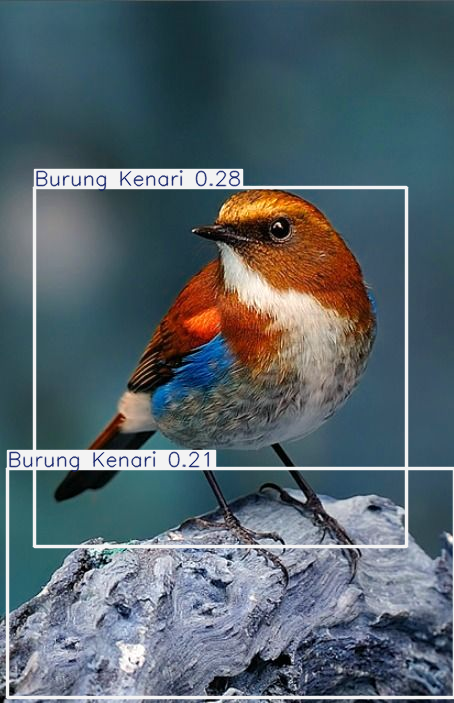

In [ ]:
# 이미지 추론 예제 코드

import torch
import cv2
import matplotlib.pyplot as plt
import os  # Import the os module

from google.colab import drive
drive.mount('/content/drive')
# Import the necessary function for displaying images in Colab
from google.colab.patches import cv2_imshow

# 학습된 모델 경로
MODEL_PATH = "/content/drive/My Drive/yolov5/runs/train/yolov5s_results4/weights/best.pt"  # 학습된 모델 파일 경로

# 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path=MODEL_PATH)  # 사용자 정의 모델 로드

def preprocess_image(image_path, img_size=640):
    """
    YOLOv5 모델에 적합한 입력 이미지를 전처리합니다.
    Args:
        image_path (str): 입력 이미지 경로
        img_size (int): YOLOv5 입력 이미지 크기 (기본값: 640)
    Returns:
        img_input (np.ndarray): YOLOv5에 적합한 크기로 변환된 이미지 (배열)
    """
    # 1. 이미지 읽기
    original_image = cv2.imread(image_path)  # BGR 형식으로 읽기
    if original_image is None:
        raise FileNotFoundError(f"이미지를 찾을 수 없습니다: {image_path}")

    # 2. 이미지 크기 정보 가져오기
    h, w = original_image.shape[:2]

    # 3. 비율을 유지하면서 크기 조정
    scale = img_size / max(h, w)  # 가장 큰 변이 img_size에 맞도록 비율 계산
    new_h, new_w = int(h * scale), int(w * scale)
    resized_image = cv2.resize(original_image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

    # 4. 패딩 추가
    top_pad = (img_size - new_h) // 2
    bottom_pad = img_size - new_h - top_pad
    left_pad = (img_size - new_w) // 2
    right_pad = img_size - new_w - left_pad
    padded_image = cv2.copyMakeBorder(resized_image, top_pad, bottom_pad, left_pad, right_pad,
                                      cv2.BORDER_CONSTANT, value=(114, 114, 114))  # 배경은 114로 채움

    # 5. BGR -> RGB 변환 및 정규화
    padded_image = cv2.cvtColor(padded_image, cv2.COLOR_BGR2RGB)  # YOLOv5는 RGB 사용
    img_input = padded_image / 255.0  # 0-1로 정규화

    return img_input

def infer_image(input_data):
    # 1. 이미지 로드 또는 처리
    if isinstance(input_data, str):  # 파일 경로인 경우
        image = cv2.imread(input_data)
        if image is None:
            print(f"Error: Failed to load image from {input_data}")
            return
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    elif isinstance(input_data, np.ndarray):  # 전처리된 이미지인 경우
        image = (input_data * 255).astype(np.uint8)  # 0-1로 정규화된 이미지를 0-255 범위로 변환
    else:
        raise ValueError("input_data는 이미지 경로(str) 또는 전처리된 이미지(np.ndarray)여야 합니다.")

    # 2. YOLOv5 추론 수행
    model.conf = 0.1  # 신뢰도 임계값 설정
    results = model(image)  # 모델 추론
    print("results=", results)

    # 3. 결과 시각화
    results.render()  # 결과를 이미지에 그리기
    cv2_imshow(image)  # Colab에서 이미지 표시


if __name__ == "__main__":
    # 이미지 추론
#    IMAGE_PATH = "/content/drive/My Drive/Data/test bird.jpg"  # 추론할 이미지 경로
    IMAGE_PATH = "/content/drive/My Drive/Data/bird.jpg"  # 추론할 이미지 경로
    img_size = 640  # YOLOv5 기본 입력 크기

    img_input = preprocess_image(IMAGE_PATH, img_size)
    infer_image(IMAGE_PATH)


In [ ]:
import os

file_path = "/content/drive/My Drive/Data/test bird.jpg"

if os.path.exists(file_path):
    print(f"파일이 존재합니다: {file_path}")
else:
    print(f"파일이 존재하지 않습니다: {file_path}")


파일이 존재합니다: /content/drive/My Drive/Data/test bird.jpg
